### Exemplo: No nosso caso, vamos ver a performance de uma carteira de ativos. Vamos chamar de carteira do Lira.

- Temos o arquivo 'Carteira.xlsx' com os ativos e suas respectivas quantidades
- Vamos analisar como que os ativos performaram, quanto que rendeu a carteira como um todo e comparar com o IBOV

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web

carteira = pd.read_excel('Carteira.xlsx')
display(carteira)

,Ativos,Tipo,Qtde
0,BOVA11,ETF,100
1,SMAL11,ETF,100
2,MGLU3,Ação,1000
3,BBDC4,Ação,100
4,ITUB4,Ação,100
5,ENEV3,Ação,300
6,MOVI3,Ação,100
7,BPAC11,Ação,100
8,GNDI3,Ação,100
9,NTCO3,Ação,100


### Criando nosso dataframe de Cotações dos ativos da carteira

In [2]:
cotacoes_carteira = pd.DataFrame()

for ativo in carteira['Ativos']:
    cotacoes_carteira[ativo] = web.DataReader('{}.SA'.format(ativo), data_source='yahoo', start='2020-01-01', end='2020-11-10')['Adj Close']
    
display(cotacoes_carteira)

,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,GNDI3,NTCO3,BCRI11,VILG11,KNRI11,XPLG11
Date,,,,,,,,,,,,,,
2020-01-02,114.239998,139.500000,12.029736,32.216328,36.299713,10.9650,19.055840,18.437342,70.915001,38.330002,126.190002,149.000000,199.600006,NaN
2020-01-03,113.800003,140.899994,11.922435,32.231152,35.917923,11.0675,19.561920,18.490847,72.241066,41.000000,127.699997,147.000000,199.600006,NaN
2020-01-06,112.589996,139.100006,11.932189,31.655453,35.383392,11.3500,19.634151,18.464094,69.262352,40.130001,126.699997,148.559998,197.979996,NaN
2020-01-07,112.239998,139.399994,11.898048,31.105511,34.562515,11.2650,19.594961,18.537760,66.897202,40.779999,126.870003,143.830002,198.750000,NaN
2020-01-08,111.949997,138.199997,12.263844,30.624327,33.999367,11.2125,19.692936,18.373470,67.293053,40.990002,124.570000,139.470001,187.500000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-04,94.160004,112.000000,26.143793,17.953337,24.405161,14.4000,18.164530,18.547529,71.288712,47.669998,107.500000,126.970001,158.380005,127.660004
2020-11-05,96.949997,115.900002,27.401571,18.231144,24.981123,14.6775,19.222658,19.367037,72.212227,50.279999,107.500000,128.380005,158.179993,127.959999
2020-11-06,97.190002,117.510002,27.281780,18.187740,24.951832,14.7925,19.820301,19.579319,73.344261,50.630001,107.349998,128.029999,158.440002,130.000000


### Será que todos os dados vieram corretos?

In [3]:
cotacoes_carteira.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 214 entries, 2020-01-02 to 2020-11-10
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BOVA11  214 non-null    float64
 1   SMAL11  214 non-null    float64
 2   MGLU3   214 non-null    float64
 3   BBDC4   214 non-null    float64
 4   ITUB4   214 non-null    float64
 5   ENEV3   214 non-null    float64
 6   MOVI3   214 non-null    float64
 7   BPAC11  214 non-null    float64
 8   GNDI3   214 non-null    float64
 9   NTCO3   214 non-null    float64
 10  BCRI11  214 non-null    float64
 11  VILG11  214 non-null    float64
 12  KNRI11  214 non-null    float64
 13  XPLG11  110 non-null    float64
dtypes: float64(14)
memory usage: 25.1 KB


### Ajustando os dados

In [4]:
#df_media = cotacoes_carteira.mean()
#cotacoes_carteira = cotacoes_carteira.fillna(df_media)
cotacoes_carteira = cotacoes_carteira.ffill()
cotacoes_carteira.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 214 entries, 2020-01-02 to 2020-11-10
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BOVA11  214 non-null    float64
 1   SMAL11  214 non-null    float64
 2   MGLU3   214 non-null    float64
 3   BBDC4   214 non-null    float64
 4   ITUB4   214 non-null    float64
 5   ENEV3   214 non-null    float64
 6   MOVI3   214 non-null    float64
 7   BPAC11  214 non-null    float64
 8   GNDI3   214 non-null    float64
 9   NTCO3   214 non-null    float64
 10  BCRI11  214 non-null    float64
 11  VILG11  214 non-null    float64
 12  KNRI11  214 non-null    float64
 13  XPLG11  110 non-null    float64
dtypes: float64(14)
memory usage: 25.1 KB


### Vamos ver como que as ações foram individualmente

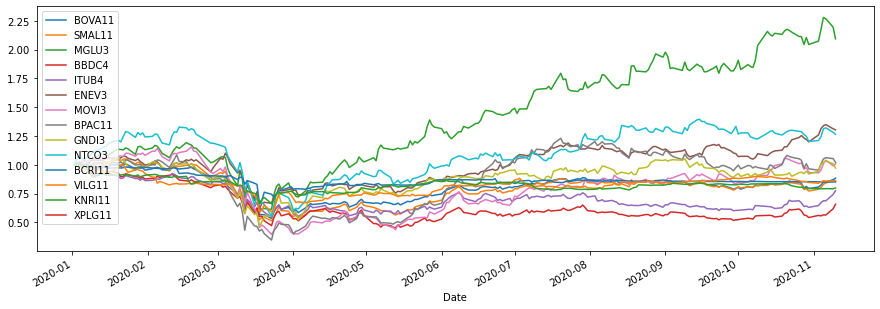

In [5]:
carteira_norm = cotacoes_carteira / cotacoes_carteira.iloc[0]
carteira_norm.plot(figsize=(15, 5))
plt.legend(loc='upper left')

### Vamos puxar o IBOV para comparar

In [6]:
cotacao_ibov = web.DataReader('^BVSP', data_source='yahoo', start='2020-01-01', end='2020-11-10')
display(cotacao_ibov)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,118573.0,115649.0,115652.0,118573.0,5162700.0,118573.0
2020-01-03,118792.0,117341.0,118564.0,117707.0,6834500.0,117707.0
2020-01-06,117707.0,116269.0,117707.0,116878.0,6570000.0,116878.0
2020-01-07,117076.0,115965.0,116872.0,116662.0,4854100.0,116662.0
2020-01-08,117335.0,115693.0,116667.0,116247.0,5910500.0,116247.0
...,...,...,...,...,...,...
2020-11-04,98296.0,95987.0,95992.0,97811.0,10704600.0,97811.0
2020-11-05,100922.0,97872.0,97873.0,100774.0,10455300.0,100774.0
2020-11-06,100928.0,99837.0,100751.0,100799.0,8382800.0,100799.0


### Criando um dataframe da Carteira com as quantidades de ações

In [7]:
valor_investido = pd.DataFrame()

for ativo in carteira['Ativos']:
    valor_investido[ativo] = cotacoes_carteira[ativo] * carteira.loc[carteira['Ativos']==ativo, 'Qtde'].values[0]
display(valor_investido)

,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,GNDI3,NTCO3,BCRI11,VILG11,KNRI11,XPLG11
Date,,,,,,,,,,,,,,
2020-01-02,11423.999786,13950.000000,12029.735565,3221.632767,3629.971313,3289.500046,1905.583954,1843.734169,7091.500092,3833.000183,12619.000244,14900.000000,19960.000610,NaN
2020-01-03,11380.000305,14089.999390,11922.434807,3223.115158,3591.792297,3320.250034,1956.192017,1849.084663,7224.106598,4100.000000,12769.999695,14700.000000,19960.000610,NaN
2020-01-06,11258.999634,13910.000610,11932.188988,3165.545273,3538.339233,3405.000114,1963.415146,1846.409416,6926.235199,4013.000107,12669.999695,14855.999756,19797.999573,NaN
2020-01-07,11223.999786,13939.999390,11898.048401,3110.551071,3456.251526,3379.500103,1959.496117,1853.775978,6689.720154,4077.999878,12687.000275,14383.000183,19875.000000,NaN
2020-01-08,11194.999695,13819.999695,12263.843536,3062.432671,3399.936676,3363.749886,1969.293594,1837.347031,6729.305267,4099.000168,12456.999969,13947.000122,18750.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-04,9416.000366,11200.000000,26143.793106,1795.333672,2440.516090,4319.999886,1816.452980,1854.752922,7128.871155,4766.999817,10750.000000,12697.000122,15838.000488,12766.000366
2020-11-05,9694.999695,11590.000153,27401.571274,1823.114395,2498.112297,4403.249931,1922.265816,1936.703682,7221.222687,5027.999878,10750.000000,12838.000488,15817.999268,12795.999908
2020-11-06,9719.000244,11751.000214,27281.780243,1818.774033,2495.183182,4437.749863,1982.030106,1957.931900,7334.426117,5063.000107,10734.999847,12802.999878,15844.000244,13000.000000


### Comparação Carteira x IBOV

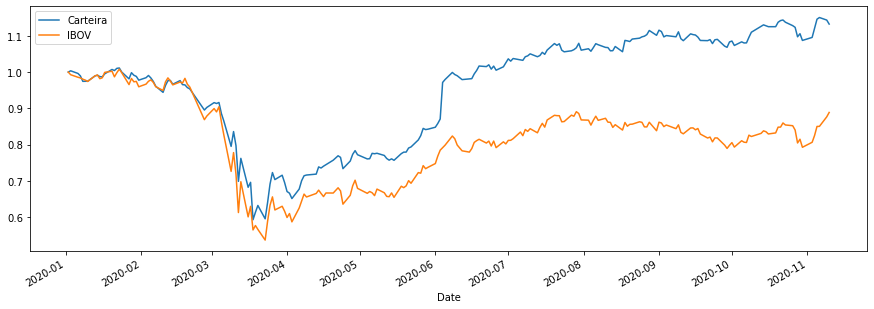

In [8]:
valor_investido['Total'] = valor_investido.sum(axis=1)

valor_investido_norm = valor_investido / valor_investido.iloc[0]
cotacao_ibov_norm = cotacao_ibov / cotacao_ibov.iloc[0]

valor_investido_norm['Total'].plot(figsize=(15, 5), label='Carteira')
cotacao_ibov_norm['Adj Close'].plot(label='IBOV')
plt.legend()
plt.show()

In [9]:
retorno_carteira = valor_investido['Total'][-1] / valor_investido['Total'][0] - 1
retorno_ibov = cotacao_ibov['Adj Close'][-1] / cotacao_ibov['Adj Close'][0] - 1
print('Retorno da Carteira: {:.2%}'.format(retorno_carteira))
print('Retorno IBOV: {:.2%}'.format(retorno_ibov))

Retorno da Carteira: 13.26%
Retorno IBOV: -11.15%


### Correlação da Carteira com o IBOV

In [10]:
correlacao = valor_investido['Total'].corr(cotacao_ibov['Adj Close'])
print(correlacao)

0.7272475335512214
